In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Input data

In [46]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Statistik dari data



In [47]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**CEK Value yg kosong**

In [48]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# **Data Processing**

# Median
**pada Data frame age atau umur yg kosong akan diisi oleh median dari data frame age itu sendiri**

In [49]:
df['Age'] = df['Age'].fillna(df['Age'].median())

# Modus 
**DImana embarked ini yg kosong akan diisi oleh modus dari dara embarked itu sendiri**

In [50]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop
**jadi data frame Cabin itu sendiri tidak terlalu berguna untuk analisa data kali ini
maka dari itu saya memanggil *drop* untuk menghapus atau menghilangkan dataframe Cabin**

In [51]:
df = df.drop('Cabin', axis=1)

# Chek hasil setelah proses diatas menggunakan isnull().sum()

In [52]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# import library untuk EDA

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


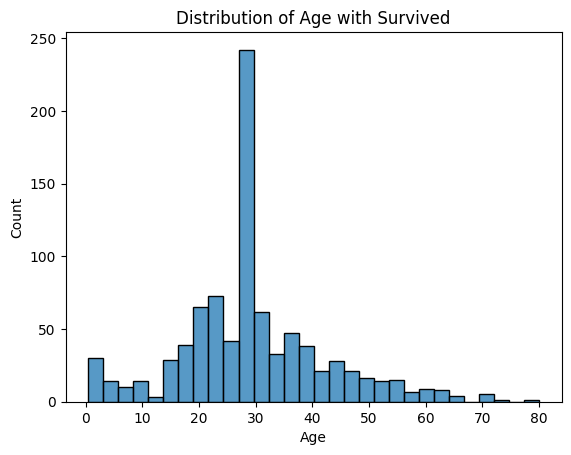

In [54]:
sns.histplot(data=df, x='Age')
plt.title('Distribution of Age with Survived')
plt.show()

anak anak dibawah 10 tahun lebih berpeluang selamat

# analisa box

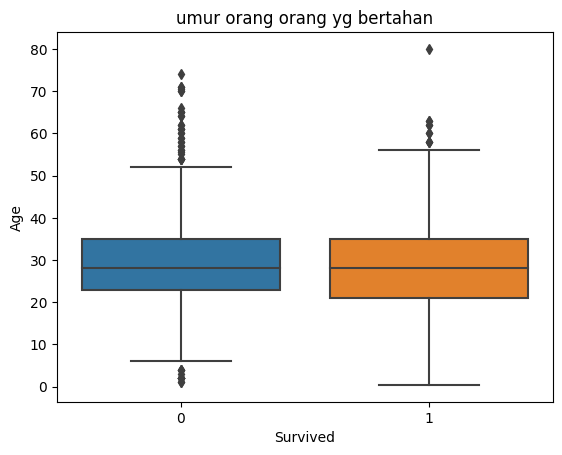

In [55]:
sns.boxplot(data=df, x='Survived', y='Age')
plt.title('umur orang orang yg bertahan')
plt.show()

arena box survive 1 = selamat, lebih rendah dibanding yg tidak selamat

# analisa kolom fare


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


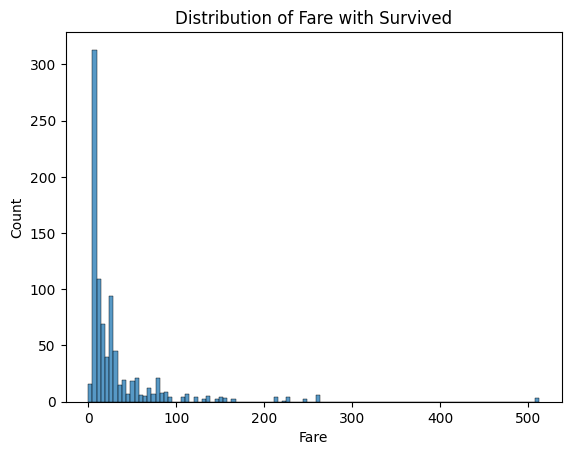

In [56]:
sns.histplot(data=df, x='Fare')
plt.title('Distribution of Fare with Survived')
plt.show()

orang yg membayar lebih mahal peluang selamat lebih tinggi


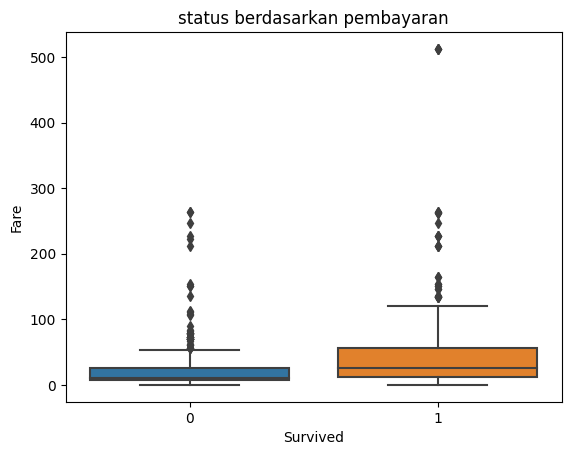

In [57]:
sns.boxplot(data=df, x='Survived', y='Fare')
plt.title('status berdasarkan pembayaran')
plt.show()

area boxplot yang selamat pada kolom fare lebih tinggi dibanding yg tidak selamat

# Analisa Kolom Pclass

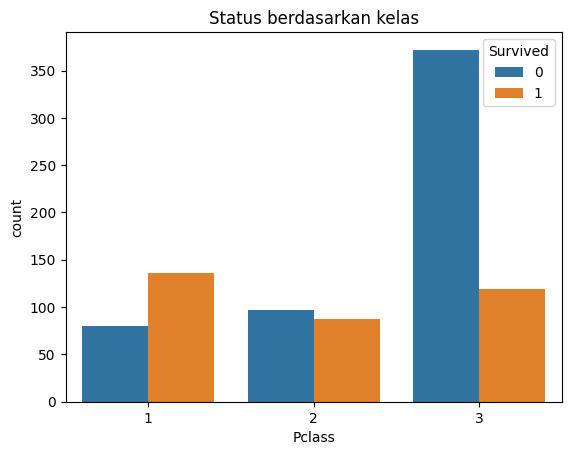

In [58]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Status berdasarkan kelas')
plt.show()

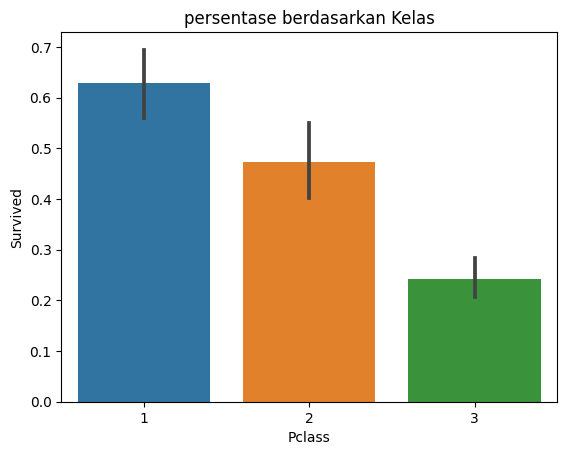

In [59]:
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('persentase berdasarkan Kelas')
plt.show()

#'barplot ' adalah fungsi untuk memanggil bar yg bisa menjadi persentase didalam 
# variabel class ini


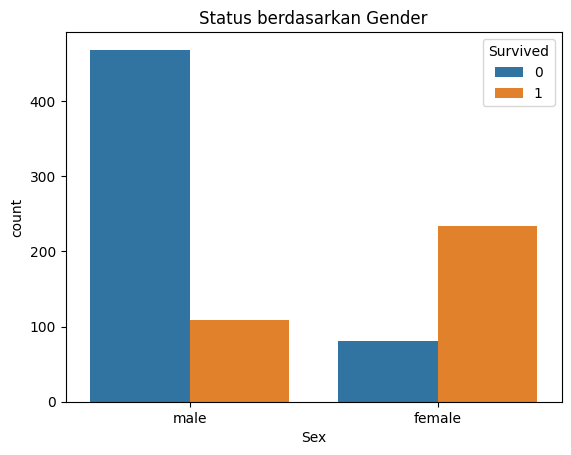

In [60]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Status berdasarkan Gender')
plt.show()

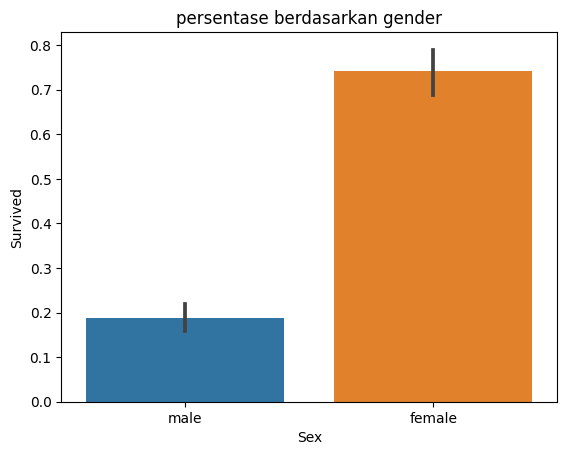

In [61]:
sns.barplot(data=df, x='Sex', y='Survived')
plt.title('persentase berdasarkan gender')
plt.show()

Persentase orang yg selamat berdasarkan Gender

# Korelasi Martix

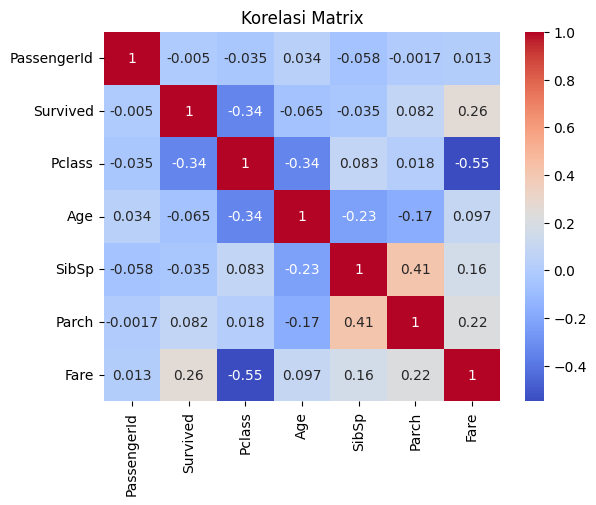

In [62]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi Matrix')
plt.show()

1. Pclass dan Fare memiliki korelasi Negatif, Semakin rendah Pclass maka semakin tinggi Fare nya
2. fitur yang paling berpengaruh terhadap survived adalah Pclass

In [63]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


# Feature Engineering 

## Label Encoder untuk mengubah data kategorik menjadi numerik

In [64]:
from sklearn.preprocessing import LabelEncoder

In [83]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [66]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


## Feature Selection

In [67]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

In [68]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [69]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Train Test Split, Memisahkan data untuk dilatih dan diuji

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Data train

In [71]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.5,0,0,28.5000,2
733,2,1,23.0,0,0,13.0000,2
382,3,1,32.0,0,0,7.9250,2
704,3,1,26.0,1,0,7.8542,2
813,3,0,6.0,4,2,31.2750,2
...,...,...,...,...,...,...,...
106,3,0,21.0,0,0,7.6500,2
270,1,1,28.0,0,0,31.0000,2
860,3,1,41.0,2,0,14.1083,2
435,1,0,14.0,1,2,120.0000,2


In [72]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

### Data test

In [73]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,1,28.0,1,1,15.2458,0
439,2,1,31.0,0,0,10.5000,2
840,3,1,20.0,0,0,7.9250,2
720,2,0,6.0,0,1,33.0000,2
39,3,0,14.0,1,0,11.2417,0
...,...,...,...,...,...,...,...
433,3,1,17.0,0,0,7.1250,2
773,3,1,28.0,0,0,7.2250,0
25,3,0,38.0,1,5,31.3875,2
84,2,0,17.0,0,0,10.5000,2


In [74]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

# Modeling

## Membangun classification model menggunakan Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

- n_estimators menentukan jumlah pohon (trees) yang akan dibuat dalam Random Forest. Ketika kita set n_estimators=100, ini berarti kita akan membuat 100 pohon keputusan (decision trees) yang berbeda. Setiap pohon akan membuat prediksi, dan hasil akhir adalah kombinasi dari semua prediksi pohon tersebut.
- random_state adalah angka yang digunakan untuk mengatur "benih" acak (random seed). Penggunaan random_state memastikan bahwa hasil yang kita dapatkan dari menjalankan model selalu konsisten. Misalnya, setiap kali kita menjalankan kode dengan random_state=42, hasilnya akan sama.

# Evaluation

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Prediksi data test menggunakan model random forest yang sudah dibangun

In [77]:
y_pred = model.predict(X_test)

In [78]:
df_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
df_comparison

,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,0
...,...,...
433,0,0
773,0,0
25,1,0
84,1,1


## Buat confusion matrix

In [79]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[92 13]
 [19 55]]


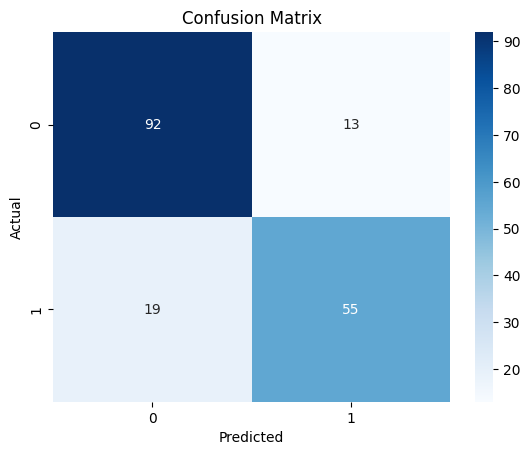

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Hitung akurasi dari prediksi

In [81]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


## Feature importances (khusus random forest)

In [82]:
feature_importance = model.feature_importances_

feature_names = X_train.columns

df_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)
df_feature_importance

,Feature,Importance
1,Sex,0.271410
5,Fare,0.265010
2,Age,0.249995
0,Pclass,0.086957
3,SibSp,0.053685
4,Parch,0.039897
6,Embarked,0.033044
